## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
print("Basic statistical summary of numeric variables:\n", df.describe())
print("\nDataset dimensions (rows, columns):", df.shape)

Basic statistical summary of numeric variables:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std  

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [39]:
bank_target = 'y'
print(df[bank_target].head())
df[bank_target] = df[bank_target].map({'yes': 1, 'no': 0})
print(df[bank_target].head())

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [40]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
unique_values = {column: bank_client[column].unique() for column in bank_client.columns}

for column, values in unique_values.items():
    print(f"Unique values for attribute '{column}': {values}\n")

Unique values for attribute 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values for attribute 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values for attribute 'marital': ['married' 'single' 'divorced' 'unknown']

Unique values for attribute 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values for attribute 'default': ['no' 'unknown' 'yes']

Unique values for attribute 'housing': ['no' 'yes' 'unknown']

Unique values for attribute 'loan': ['no' 'yes' 'unknown']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Minimal value of 'Age': 98
Maximal value of 'Age': 17
Missing values in 'Age': 0


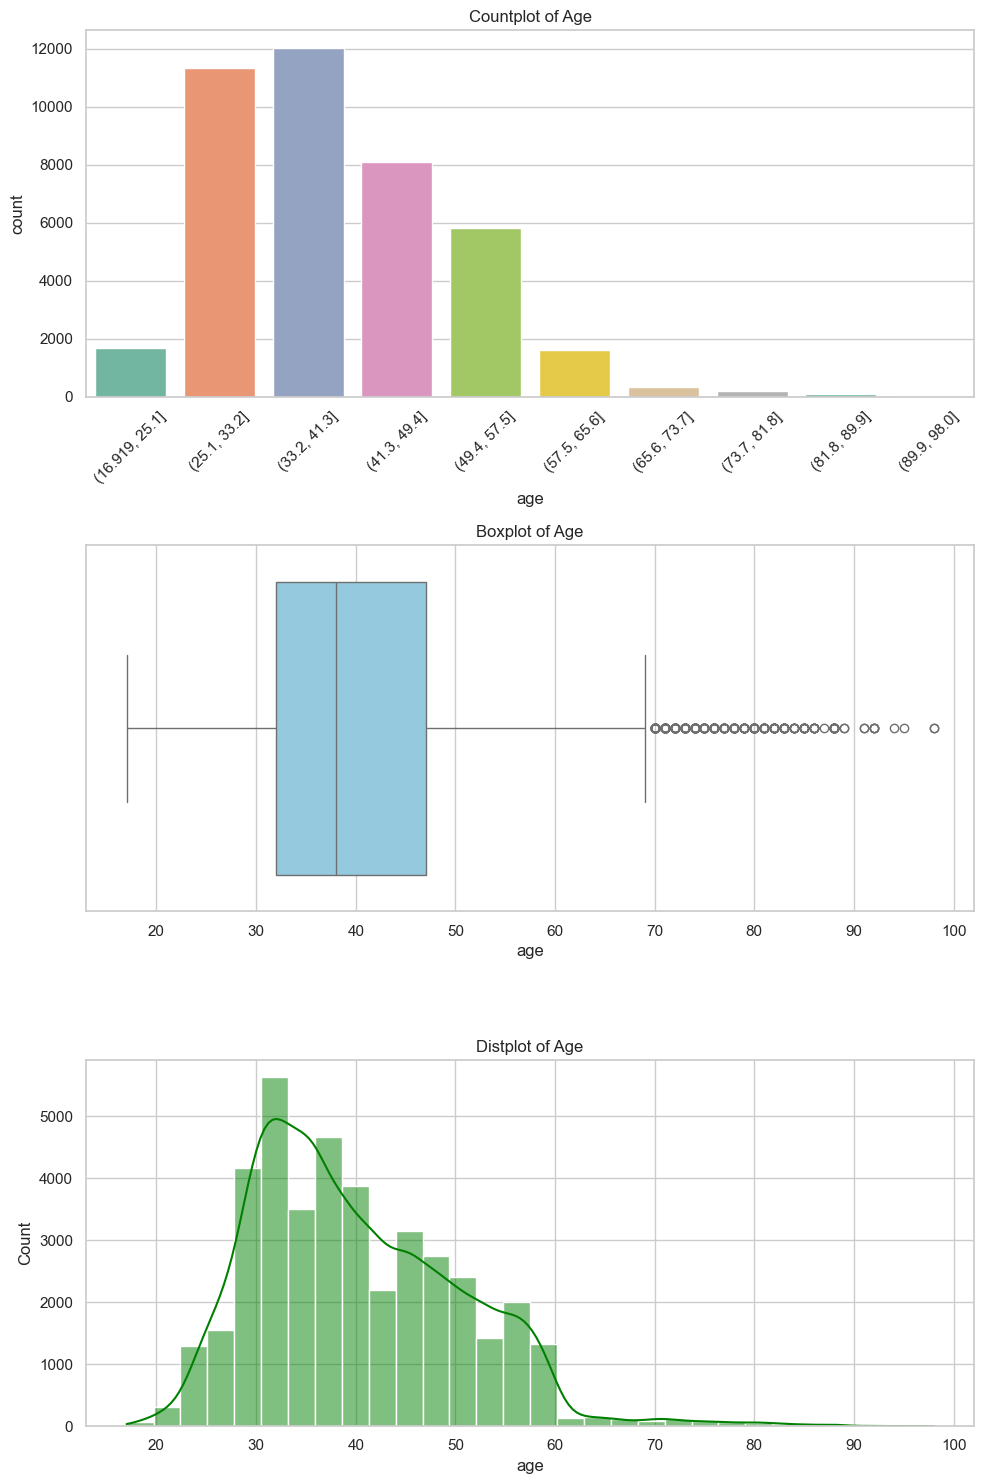

Skewness of 'Age': 0.7846968157646645


In [41]:
max_age = df['age'].max()
min_age = df['age'].min()

print(f"Minimal value of 'Age': {max_age}")
print(f"Maximal value of 'Age': {min_age}")

nan_age = df['age'].isna().sum()
print(f"Missing values in 'Age': {nan_age}")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.countplot(x=pd.cut(df['age'], bins=10), palette='Set2')
plt.title('Countplot of Age')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Boxplot of Age')

plt.subplot(3, 1, 3)
sns.histplot(df['age'], kde=True, color='green', bins=30)
plt.title('Distplot of Age')

plt.tight_layout()
plt.show()

age_skewness = df['age'].skew()
print(f"Skewness of 'Age': {age_skewness}")


**Висновки з 1-4 завдання (детальні)**

1. Цільова змінна є 'y', закодована в числа.
2. Розподіл віку нагадує нормальний.
3. Спостерігаються аномалії віку. 
4. Boxplot показує, що більшість клінтів віком від 30 до 50 років.
5. Пропущених значень для віку немає.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [42]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int = 25,
                                             high_percentile: int = 75) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually.

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100 (default: 25)
    high_percentile: upper bound between 0 and 100 (default: 75)

    returns: pd.DataFrame with detected outliers
    """

    sorted_data = np.sort(df[column])

    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)

    print(f"Q1 ({low_percentile} percentile) of the given data: {Q1}")
    print(f"Q3 ({high_percentile} percentile) of the given data: {Q3}")
    print('----------------------------------------------------------')

    IQR = Q3 - Q1

    print(f"Interquartile range (IQR): {IQR}")
    print('----------------------------------------------------------')

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(f"Lower bound: {low_lim}")
    print(f"Upper bound: {up_lim}")
    
    print('----------------------------------------------------------')
    
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print("Outliers in the dataset:")
    display(outliers)

    return outliers


In [43]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)

Q1 (10 percentile) of the given data: 28.0
Q3 (90 percentile) of the given data: 55.0
----------------------------------------------------------
Interquartile range (IQR): 27.0
----------------------------------------------------------
Lower bound: -12.5
Upper bound: 95.5
----------------------------------------------------------
Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Для параметрів low_percentile == 10 і high_percentile == 90 кількість викидів досить незначна. Значення 25 і 75, наприклад, дають 469 рядків.
2. В даному випадку викидами стали клієнти віком 98 років, що насправді зустрічається надзвичайно рідко.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

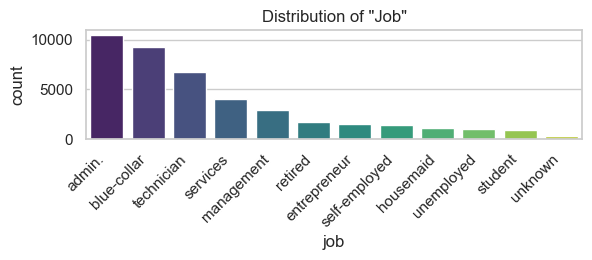

In [44]:
plt.subplot(3, 1, 1)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='viridis')
plt.title('Distribution of "Job"')
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

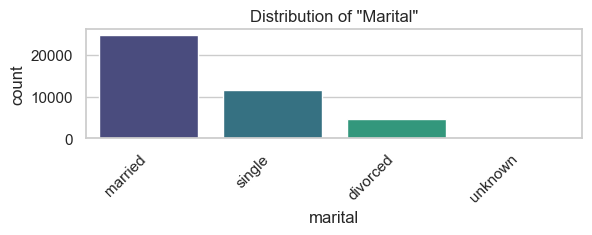

In [45]:
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette='viridis')
plt.title('Distribution of "Marital"')
plt.xticks(rotation=45, ha='right')

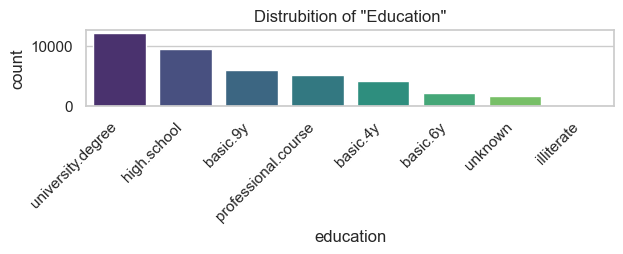

In [46]:
plt.subplot(3, 1, 3)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='viridis')
plt.title('Distrubition of "Education"')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

1. Більшість клієнтів є клерками та інженерами, досить невеликий процент самовлаштованих.
2. Одружених клієнтів приблизно вдвічі більше, ніж самотніх.
3. Основна частина клієнтів має вищу або повну середню освіту.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

([0, 1, 2], [Text(0, 0, 'no'), Text(1, 0, 'unknown'), Text(2, 0, 'yes')])

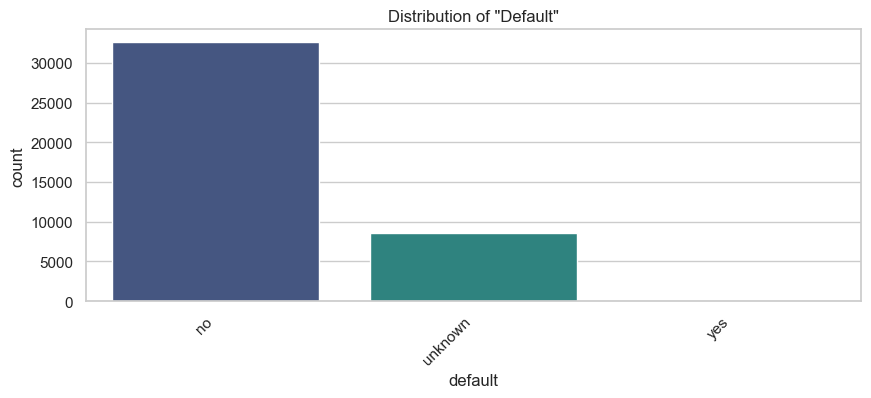

In [47]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.countplot(data=df, x='default', order=df['default'].value_counts().index, palette='viridis')
plt.title('Distribution of "Default"')
plt.xticks(rotation=45, ha='right')

([0, 1, 2], [Text(0, 0, 'yes'), Text(1, 0, 'no'), Text(2, 0, 'unknown')])

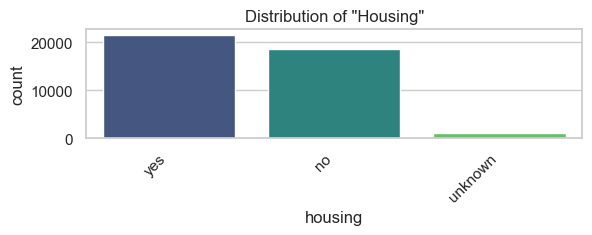

In [48]:
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index, palette='viridis')
plt.title('Distribution of "Housing"')
plt.xticks(rotation=45, ha='right')

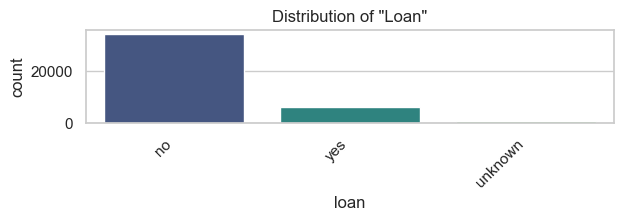

In [49]:
plt.subplot(3, 1, 3)
sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index, palette='viridis')
plt.title('Distribution of "Loan"')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [50]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
        df[col] = df[col].astype(float)
    return df

In [51]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [52]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using its quartiles (Q1, Q3)
    
    dataframe: pd.DataFrame to encode
    age_col: age column to encode 
    
    returns: pd.DataFrame with encoded values for age
    """

    Q1 = dataframe[age_col].quantile(0.25)
    Q3 = dataframe[age_col].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"Interquartile range (IQR): {IQR}")

    conditions = [
        (dataframe[age_col] < Q1),
        (dataframe[age_col] >= Q1) & (dataframe[age_col] <= Q3),
        (dataframe[age_col] > Q3)
    ]
    choices = [0, 1, 2]
    
    dataframe[age_col] = np.select(conditions, choices, default=np.nan)
    
    return dataframe

In [53]:
bank_client = encode_age(bank_client, 'age')

Q1 (25th percentile): 32.0
Q3 (75th percentile): 47.0
Interquartile range (IQR): 15.0


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

In [54]:
print(bank_client['age'].unique())

[2. 1. 0.]


Висновок. Вік закодувався в три категорії: 0, 1, 2.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [55]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration']]

print("bank_relat:")
print(bank_relat)

nan_check = bank_relat.isna().sum()
print("\nNumber of NaNs in each column:")
print(nan_check)

bank_relat:
         contact month day_of_week  duration
0      telephone   may         mon       261
1      telephone   may         mon       149
2      telephone   may         mon       226
3      telephone   may         mon       151
4      telephone   may         mon       307
...          ...   ...         ...       ...
41183   cellular   nov         fri       334
41184   cellular   nov         fri       383
41185   cellular   nov         fri       189
41186   cellular   nov         fri       442
41187   cellular   nov         fri       239

[41188 rows x 4 columns]

Number of NaNs in each column:
contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [56]:
unique_contact = df['contact'].unique()
unique_month = df['month'].unique()
unique_day_of_week = df['day_of_week'].unique()

print("Unique values for attribute 'contact':")
print(unique_contact)

print("\nUnique values for attribute 'month':")
print(unique_month)

print("\nUnique values for attribute 'day_of_week':")
print(unique_day_of_week)

Unique values for attribute 'contact':
['telephone' 'cellular']

Unique values for attribute 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values for attribute 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



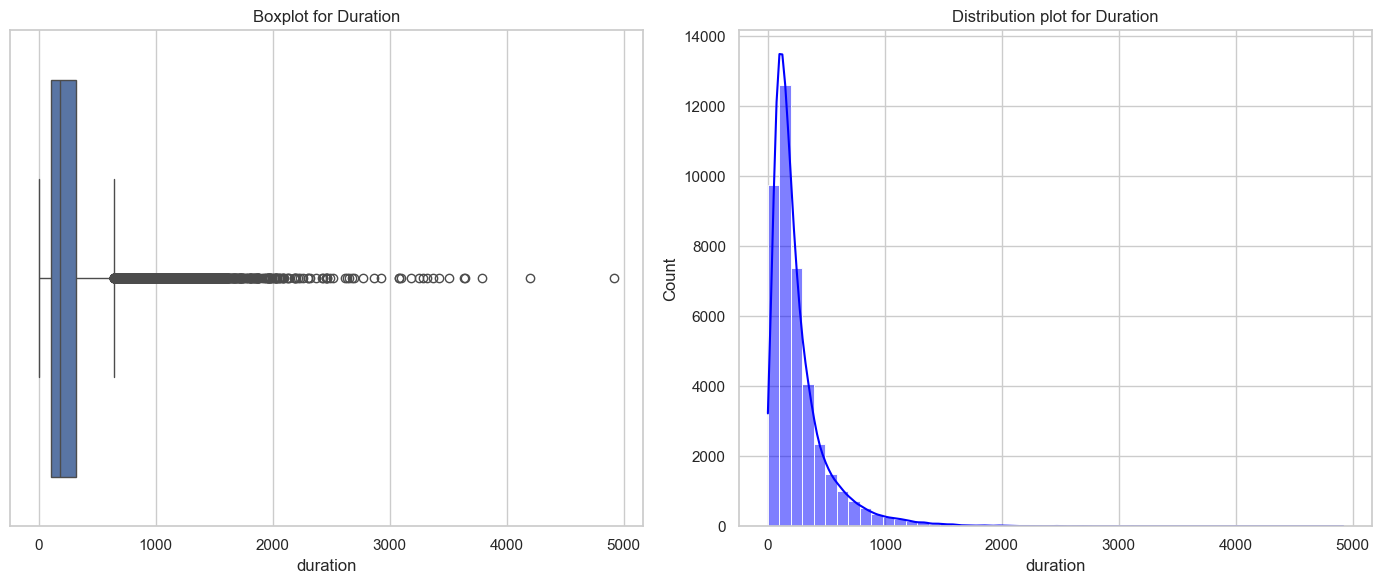

Skewness of 'duration': 3.263141255262832
Kurtosis 'duration': 20.247938014978796


In [57]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['duration'])
plt.title('Boxplot for Duration')

plt.subplot(1, 2, 2)
sns.histplot(df['duration'], kde=True, color='blue', bins=50)
plt.title('Distribution plot for Duration')

plt.tight_layout()
plt.show()

skewness = df['duration'].skew()
kurtosis = df['duration'].kurt()

print(f"Skewness of 'duration': {skewness}")
print(f"Kurtosis 'duration': {kurtosis}")

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [58]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
print(bank_relat['month'])

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
41183    7.0
41184    7.0
41185    7.0
41186    7.0
41187    7.0
Name: month, Length: 41188, dtype: float64


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [59]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column using its quartiles (Q1, Q3)
    
    dataframe: pd.DataFrame to encode
    duration_col: duration column to encode 
    
    returns: pd.DataFrame with encoded values for duration
    """

    Q1 = dataframe[duration_col].quantile(0.25)
    Q3 = dataframe[duration_col].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"Interquartile range (IQR): {IQR}")

    conditions = [
        (dataframe[duration_col] < Q1),
        (dataframe[duration_col] >= Q1) & (dataframe[duration_col] <= Q3),
        (dataframe[duration_col] > Q3)
    ]
    choices = [0, 1, 2]
    
    dataframe[duration_col] = np.select(conditions, choices, default=np.nan)
    
    return dataframe

In [60]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat['duration'].head(10))

Q1 (25th percentile): 102.0
Q3 (75th percentile): 319.0
Interquartile range (IQR): 217.0
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    2.0
9    0.0
Name: duration, dtype: float64


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [61]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [62]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [63]:
def encode_poutcome(df: pd.DataFrame, poutcome_col: str) -> pd.DataFrame:
    """
    Function for encoding the 'poutcome' column using LabelEncoder.
    
    df: pd.DataFrame to encode
    poutcome_col: the 'poutcome' column to encode
    
    returns: pd.DataFrame with encoded 'poutcome' column
    """
    le = LabelEncoder()
    df[poutcome_col] = le.fit_transform(df[poutcome_col])
    
    print("Label mapping for poutcome:", dict(zip(le.classes_, le.transform(le.classes_))))
    
    return df

bank_other = encode_poutcome(bank_other, 'poutcome')
print(bank_other['poutcome'].head(10))

Label mapping for poutcome: {'failure': np.int64(0), 'nonexistent': np.int64(1), 'success': np.int64(2)}
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: poutcome, dtype: int64


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [64]:
print("Client:", bank_client.columns)
print(bank_client.head(10))

print("Relat:", bank_relat.columns)
print(bank_relat.head(10))

print("Socec:", bank_socec.columns)
print(bank_socec.head(10))

print("Other:", bank_other.columns)
print(bank_other.head(10))

bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1)

Client: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')
   age  job  marital  education  default  housing  loan
0  2.0  3.0      1.0        0.0      0.0      0.0   0.0
1  2.0  7.0      1.0        3.0      1.0      0.0   0.0
2  1.0  7.0      1.0        3.0      0.0      2.0   0.0
3  1.0  0.0      1.0        1.0      0.0      0.0   0.0
4  2.0  7.0      1.0        3.0      0.0      0.0   2.0
5  1.0  7.0      1.0        2.0      1.0      0.0   0.0
6  2.0  0.0      1.0        5.0      0.0      0.0   0.0
7  1.0  1.0      1.0        7.0      1.0      0.0   0.0
8  0.0  9.0      2.0        5.0      0.0      2.0   0.0
9  0.0  7.0      2.0        3.0      0.0      2.0   0.0
Relat: Index(['contact', 'month', 'day_of_week', 'duration'], dtype='object')
   contact  month  day_of_week  duration
0      1.0    6.0          1.0       1.0
1      1.0    6.0          1.0       1.0
2      1.0    6.0          1.0       1.0
3      1.0    6.0          1.0       1.0
4

**Завдання 19** Провести ділення вибірки

In [65]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets (float, between 0 and 1)
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [66]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, df[bank_target], 0.2, 10, 101)

In [67]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [68]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, logpred))

lr_acc = accuracy_score(y_test, logpred) * 100
print("Accuracy Score: ", lr_acc, "%")

LOGCV = cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print("Cross-validation Accuracy: ", round(LOGCV * 100, 2), "%")

Confusion Matrix:
[[7103  176]
 [ 633  326]]
Accuracy Score:  90.17965525613013 %
Cross-validation Accuracy:  90.19 %


## k-NN

k=1 86.67 (+/- 0.63)
k=2 89.27 (+/- 0.53)
k=3 88.63 (+/- 0.58)
k=4 89.63 (+/- 0.57)
k=5 89.51 (+/- 0.65)
k=6 89.91 (+/- 0.58)
k=7 89.87 (+/- 0.68)
k=8 90.08 (+/- 0.61)
k=9 89.98 (+/- 0.68)
k=10 90.21 (+/- 0.66)
k=11 90.21 (+/- 0.67)
k=12 90.29 (+/- 0.65)
k=13 90.31 (+/- 0.70)
k=14 90.33 (+/- 0.64)
k=15 90.34 (+/- 0.73)
k=16 90.35 (+/- 0.70)
k=17 90.38 (+/- 0.79)
k=18 90.33 (+/- 0.66)
k=19 90.34 (+/- 0.70)
k=20 90.37 (+/- 0.67)
k=21 90.35 (+/- 0.63)
k=22 90.33 (+/- 0.63)
k=23 90.43 (+/- 0.65)
k=24 90.35 (+/- 0.61)
k=25 90.36 (+/- 0.62)
The optimal number of neighbors is 22 with 90.4%


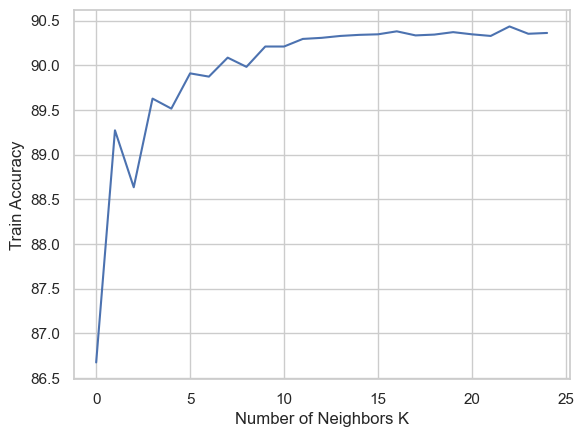

In [70]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [71]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, knnpred))

knn_acc = accuracy_score(y_test, knnpred) * 100
print("Accuracy Score: ", knn_acc, "%")

KNNCV = cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print("Cross-validation Accuracy: ", round(KNNCV * 100, 2), "%")

Confusion Matrix:
[[7160  119]
 [ 727  232]]
Accuracy Score:  89.73051711580482 %
Cross-validation Accuracy:  90.33 %


## Логістична Регресія

In [72]:
models = pd.DataFrame({
    'Models': ['Logistic Regression', 'KNN'],
    'Score': [lr_acc, knn_acc]
})

print(models)

                Models      Score
0  Logistic Regression  90.179655
1                  KNN  89.730517


**Висновки по моделям (детальні)**

1. Точність обидвох моделей приблизно однакова.
2. Якщо важлива швидкість, логістична регресія може бути кращим вибором.
3. Для пріорітизації точності краще підходить KNN з k = 22.